In [225]:
import pandas as pd
df = pd.read_excel('AirQualityUCI _ Students.xlsx')
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8353,2005-04-01,10:00:00,1.0,947.75,-200,3.525377,683.75,180.0,851.00,119.9,1010.50,599.00,16.450,40.775000,0.757020
8354,2005-04-01,11:00:00,1.0,938.50,-200,3.576895,686.75,197.1,869.75,122.9,980.50,549.50,18.925,33.775001,0.731210
8355,2005-04-01,12:00:00,1.1,924.50,-200,4.045717,713.25,172.0,853.00,114.9,956.75,518.00,19.175,29.475000,0.648005
8356,2005-04-01,13:00:00,1.3,923.75,-200,4.519882,738.75,183.6,833.75,122.2,966.00,540.50,19.925,26.300000,0.605405


# Parpare the Date:

In [226]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Identify variation range for input and output variables
variation_range = df.describe()
variation_range

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,8358,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000
mean,2004-09-20 04:16:42.727925376,-36.187928,1038.533411,-158.119167,0.894268,889.323901,162.607933,790.043631,53.912228,1382.696877,968.419987,8.713360,38.201273,-7.780588
min,2004-03-10 00:00:00,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,2004-06-17 00:00:00,0.500000,915.062500,-200.000000,3.968875,709.000000,45.000000,634.250000,49.000000,1177.500000,692.062500,10.450000,33.974999,0.675253
50%,2004-09-21 00:00:00,1.500000,1048.500000,-200.000000,7.826424,892.000000,136.000000,793.000000,95.000000,1442.500000,940.125000,17.225000,48.137500,0.971383
75%,2004-12-27 00:00:00,2.600000,1215.687500,-200.000000,13.636091,1104.750000,282.000000,958.687500,132.000000,1658.187500,1251.750000,24.075000,61.593750,1.307486
max,2005-04-01 00:00:00,11.900000,2007.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,87.174999,2.231036
std,NaN,79.260156,338.349674,141.931963,43.609487,350.473599,260.322621,327.590979,130.150259,479.299713,464.837162,45.516939,53.678637,41.139234


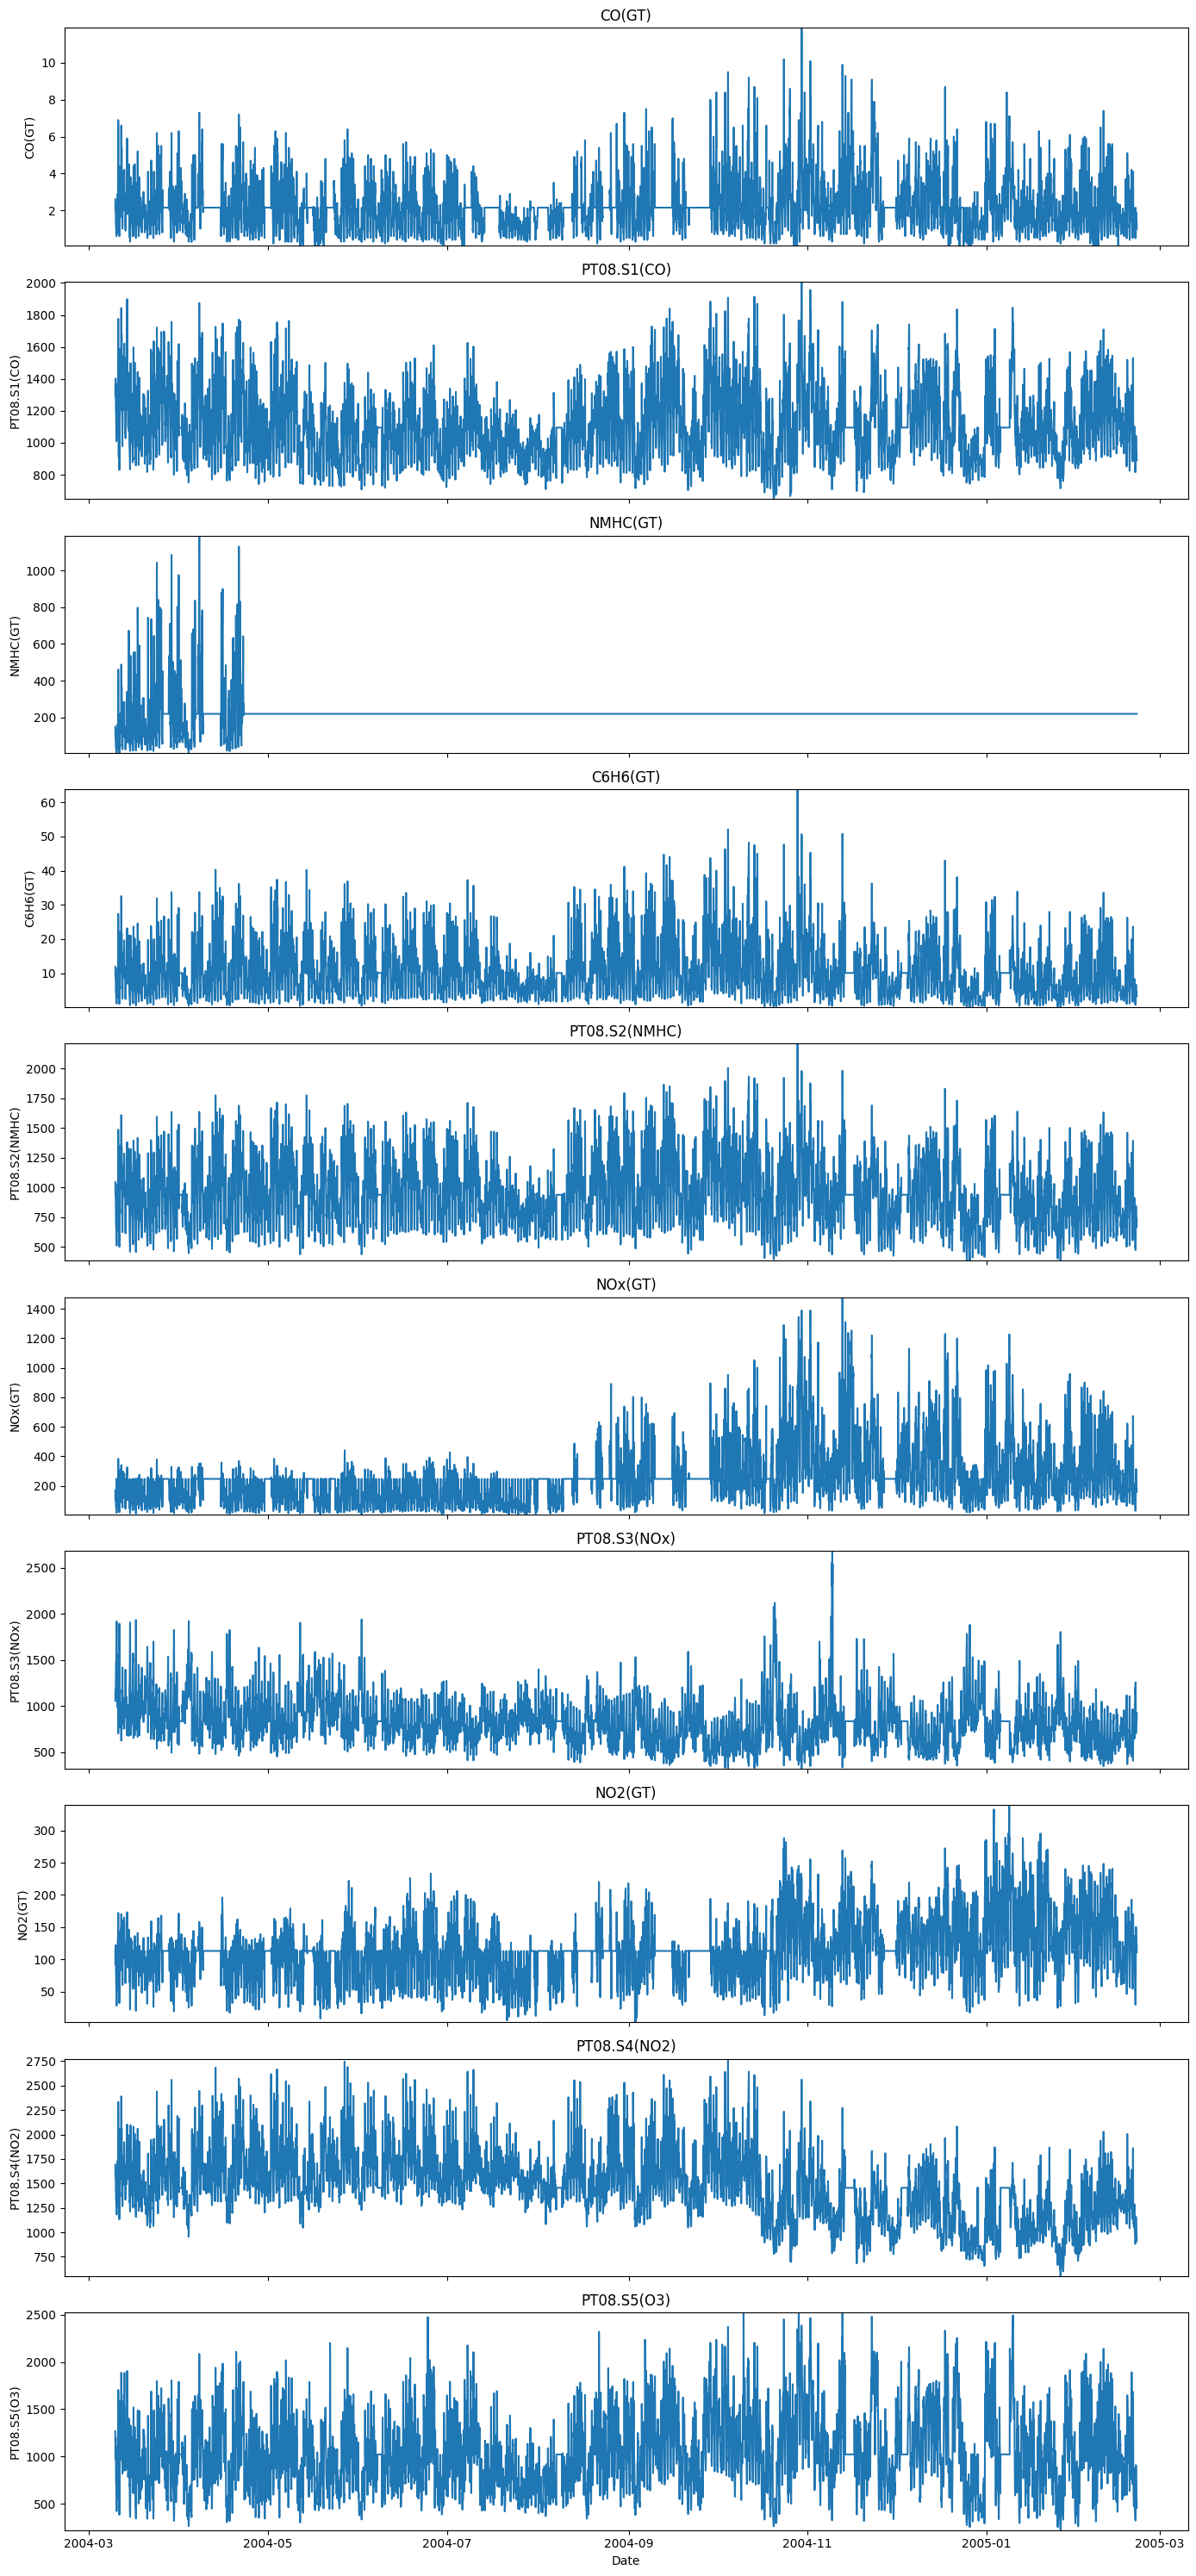

In [227]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
file_path = 'AirQualityUCI _ Students.xlsx'
data = pd.read_excel(file_path)


# Handle missing values by replacing them with the mean of the column
columns_to_plot = [
    'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 
    'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 
    'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)'
]
data[columns_to_plot] = data[columns_to_plot].replace(-200, np.nan)
data[columns_to_plot] = data[columns_to_plot].apply(lambda x: x.fillna(x.mean()), axis=0)

# Extracting the dates for plotting
dates = pd.date_range(start='2004-03-10', periods=len(data), freq='H')

# Adding the dates to the DataFrame
data['Date'] = dates

# Calculate the variation range for each column
variation_range = data[columns_to_plot].describe().loc[['min', 'max']]

# Plot each specified variable in a loop
num_columns = len(columns_to_plot)
fig, axs = plt.subplots(num_columns, 1, figsize=(14, num_columns * 3), sharex=True)

for i, col in enumerate(columns_to_plot):
    axs[i].plot(data['Date'], data[col])
    axs[i].set_title(col)
    axs[i].set_ylabel(col)
    
    # Set y-axis limits based on variation range
    min_val = variation_range.loc['min', col]
    max_val = variation_range.loc['max', col]
    axs[i].set_ylim(min_val, max_val)

# Set xlabel for the last subplot
axs[-1].set_xlabel('Date')

plt.tight_layout()
plt.show()

## Display the data after the interpolate

In [228]:
# Specify the columns to correct
columns_to_correct = [
    'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 
    'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 
    'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 
    'T', 'RH', 'AH'
]

# Replace -200 with NaN
data[columns_to_correct] = data[columns_to_correct].replace(-200, np.nan)

# Calculate the sum of missing values per column
missing_values_sum = data[columns_to_correct].isnull().sum()

# Interpolate missing values
data[columns_to_correct] = data[columns_to_correct].interpolate(method='linear')
# Display the DataFrame

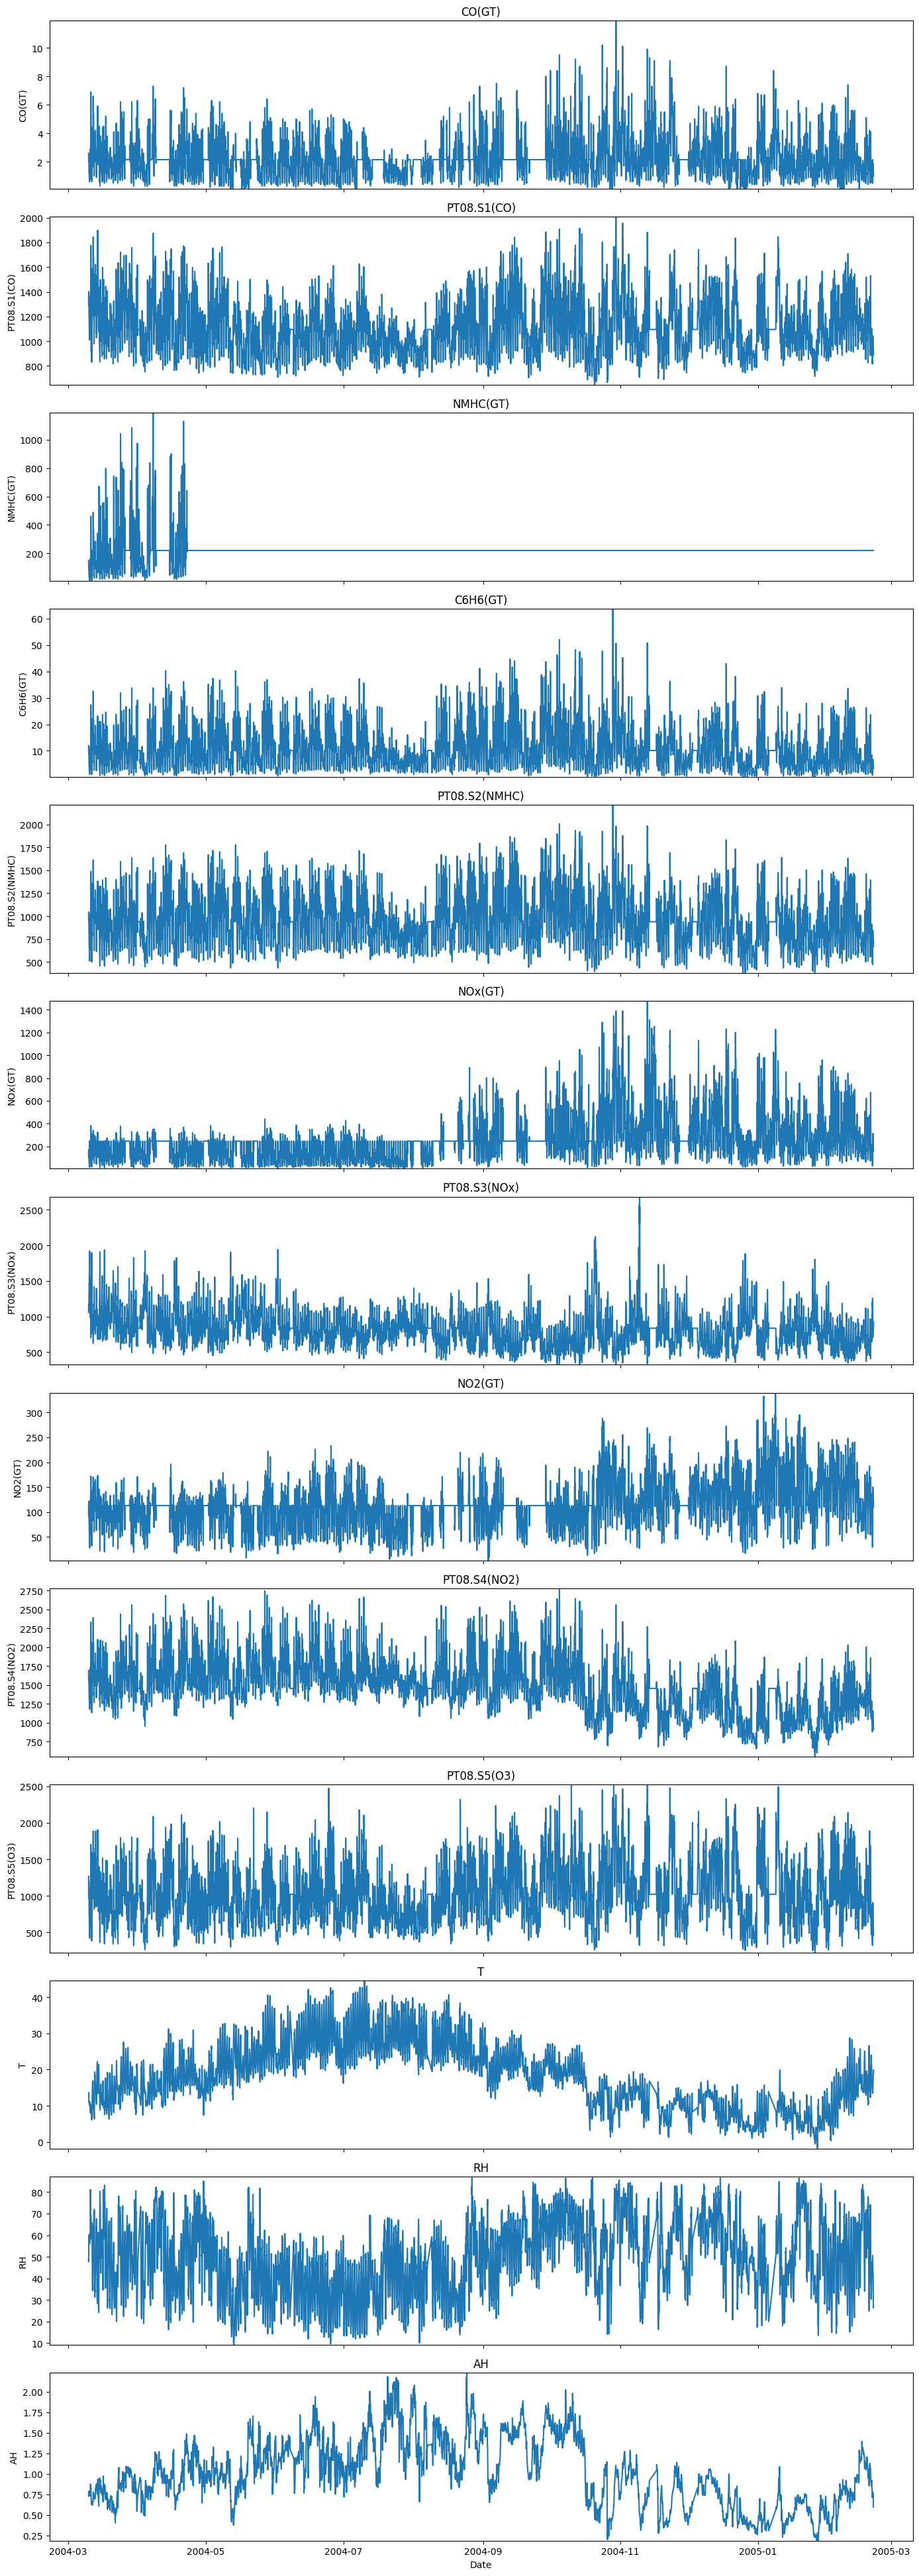

In [229]:
# Extracting the dates for plotting
dates = pd.date_range(start='2004-03-10', periods=len(data), freq='H')

# Adding the dates to the DataFrame
data['Date'] = dates

# Calculate the variation range for each column
variation_range = data[columns_to_correct].describe().loc[['min', 'max']]

# Plot each specified variable in a loop
num_columns = len(columns_to_correct)
fig, axs = plt.subplots(num_columns, 1, figsize=(14, num_columns * 3), sharex=True)

for i, col in enumerate(columns_to_correct):
    axs[i].plot(data['Date'], data[col])
    axs[i].set_title(col)
    axs[i].set_ylabel(col)
    
    # Set y-axis limits based on variation range
    min_val = variation_range.loc['min', col]
    max_val = variation_range.loc['max', col]
    axs[i].set_ylim(min_val, max_val)

# Set xlabel for the last subplot
axs[-1].set_xlabel('Date')

plt.tight_layout()
plt.show()

## Set up Model

### Classification

In [230]:
# Calculate the threshold
threshold = data['CO(GT)'].mean()

# Create the target labels
data['CO_Target'] = (data['CO(GT)'] > threshold).astype(int)
# Create lagged features (previous 1, 2, 3 hours)
lag_hours = [1, 2, 3]
for col in columns_to_correct:
    for lag in lag_hours:
        data[f'{col}_lag_{lag}'] = data[col].shift(lag)

# Drop rows with NaN values created by lagging
data.dropna(inplace=True)
display(data)  # Display the first 10 rows

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),...,PT08.S5(O3)_lag_3,T_lag_1,T_lag_2,T_lag_3,RH_lag_1,RH_lag_2,RH_lag_3,AH_lag_1,AH_lag_2,AH_lag_3
3,2004-03-10 03:00:00,21:00:00,2.2,1375.50,80.000000,9.228796,948.25,172.0,1092.00,122.0,...,1267.50,11.900,13.300000,13.600000,53.975000,47.700000,48.875001,0.750239,0.725487,0.757754
4,2004-03-10 04:00:00,22:00:00,1.6,1272.25,51.000000,6.518224,835.50,131.0,1205.00,116.0,...,972.25,11.000,11.900000,13.300000,60.000000,53.975000,47.700000,0.786713,0.750239,0.725487
5,2004-03-10 05:00:00,23:00:00,1.2,1197.00,38.000000,4.741012,750.25,89.0,1336.50,96.0,...,1074.00,11.150,11.000000,11.900000,59.575001,60.000000,53.975000,0.788794,0.786713,0.750239
6,2004-03-10 06:00:00,00:00:00,1.2,1185.00,31.000000,3.624399,689.50,62.0,1461.75,77.0,...,1203.25,11.175,11.150000,11.000000,59.175000,59.575001,60.000000,0.784772,0.788794,0.786713
7,2004-03-10 07:00:00,01:00:00,1.0,1136.25,31.000000,3.326677,672.00,62.0,1453.25,76.0,...,1110.00,11.325,11.175000,11.150000,56.775000,59.175000,59.575001,0.760312,0.784772,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8353,2005-02-21 01:00:00,10:00:00,1.0,947.75,220.216086,3.525377,683.75,180.0,851.00,119.9,...,909.00,16.125,16.075001,13.700000,41.549999,41.000001,45.850000,0.755852,0.743510,0.715407
8354,2005-02-21 02:00:00,11:00:00,1.0,938.50,220.216086,3.576895,686.75,197.1,869.75,122.9,...,869.25,16.450,16.125000,16.075001,40.775000,41.549999,41.000001,0.757020,0.755852,0.743510
8355,2005-02-21 03:00:00,12:00:00,1.1,924.50,220.216086,4.045717,713.25,172.0,853.00,114.9,...,652.25,18.925,16.450000,16.125000,33.775001,40.775000,41.549999,0.731210,0.757020,0.755852
8356,2005-02-21 04:00:00,13:00:00,1.3,923.75,220.216086,4.519882,738.75,183.6,833.75,122.2,...,599.00,19.175,18.925000,16.450000,29.475000,33.775001,40.775000,0.648005,0.731210,0.757020


### Feature Correlation

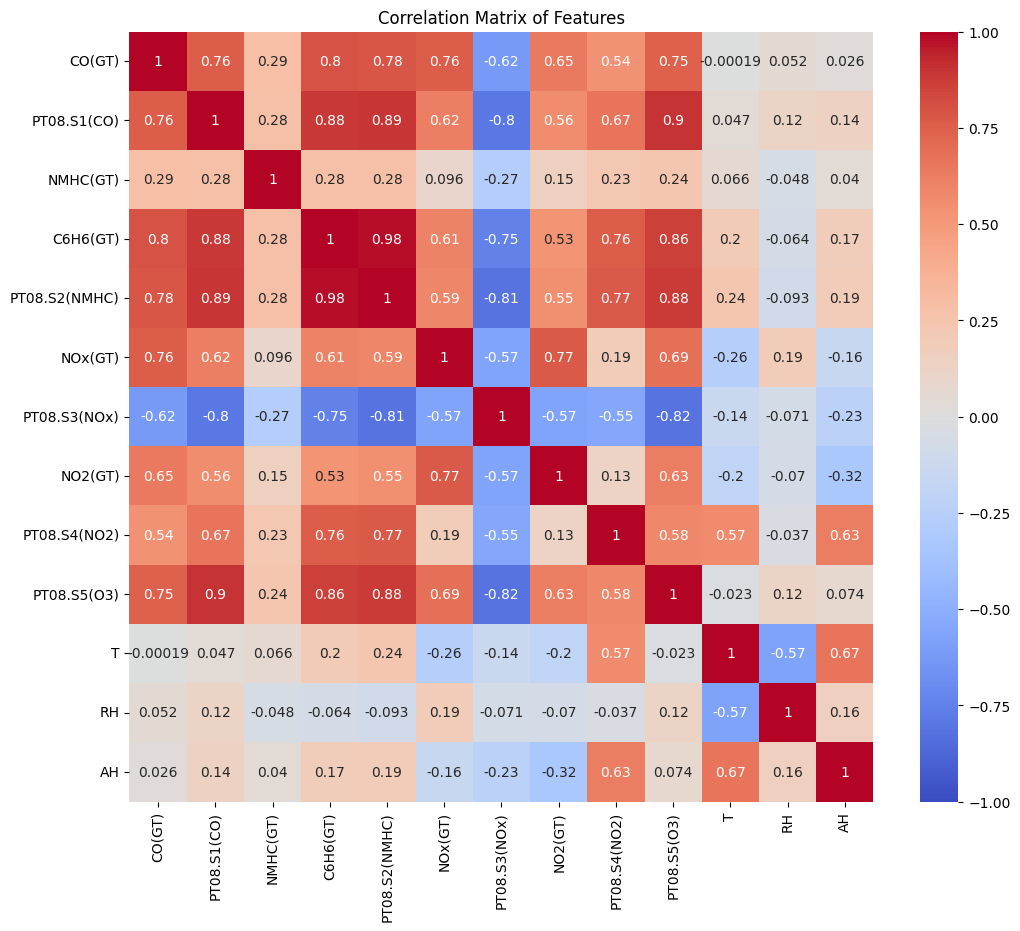

In [231]:
# Calculate the correlation matrix
correlation_matrix = data[columns_to_correct].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features')
plt.show()

## Create the Feature Set and Target Variable

In [232]:
# Drop the original target column and datetime columns
columns_to_drop = ["Date", "Time", "CO(GT)", "NMHC(GT)", "PT08.S4(NO2)", "PT08.S3(NOx)", "T", "RH", "AH", "CO_Target"]
X = data.drop(columns=columns_to_drop)
y = data['CO_Target']

# Display the first few rows of the feature set and target variable
display(X)

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),NO2(GT),PT08.S5(O3),CO(GT)_lag_1,CO(GT)_lag_2,CO(GT)_lag_3,PT08.S1(CO)_lag_1,...,PT08.S5(O3)_lag_3,T_lag_1,T_lag_2,T_lag_3,RH_lag_1,RH_lag_2,RH_lag_3,AH_lag_1,AH_lag_2,AH_lag_3
3,1375.50,9.228796,948.25,172.0,122.0,1203.25,2.2,2.0,2.6,1402.00,...,1267.50,11.900,13.300000,13.600000,53.975000,47.700000,48.875001,0.750239,0.725487,0.757754
4,1272.25,6.518224,835.50,131.0,116.0,1110.00,2.2,2.2,2.0,1375.50,...,972.25,11.000,11.900000,13.300000,60.000000,53.975000,47.700000,0.786713,0.750239,0.725487
5,1197.00,4.741012,750.25,89.0,96.0,949.25,1.6,2.2,2.2,1272.25,...,1074.00,11.150,11.000000,11.900000,59.575001,60.000000,53.975000,0.788794,0.786713,0.750239
6,1185.00,3.624399,689.50,62.0,77.0,732.50,1.2,1.6,2.2,1197.00,...,1203.25,11.175,11.150000,11.000000,59.175000,59.575001,60.000000,0.784772,0.788794,0.786713
7,1136.25,3.326677,672.00,62.0,76.0,729.50,1.2,1.2,1.6,1185.00,...,1110.00,11.325,11.175000,11.150000,56.775000,59.175000,59.575001,0.760312,0.784772,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8353,947.75,3.525377,683.75,180.0,119.9,599.00,1.3,1.9,1.5,965.00,...,909.00,16.125,16.075001,13.700000,41.549999,41.000001,45.850000,0.755852,0.743510,0.715407
8354,938.50,3.576895,686.75,197.1,122.9,549.50,1.0,1.3,1.9,947.75,...,869.25,16.450,16.125000,16.075001,40.775000,41.549999,41.000001,0.757020,0.755852,0.743510
8355,924.50,4.045717,713.25,172.0,114.9,518.00,1.0,1.0,1.3,938.50,...,652.25,18.925,16.450000,16.125000,33.775001,40.775000,41.549999,0.731210,0.757020,0.755852
8356,923.75,4.519882,738.75,183.6,122.2,540.50,1.1,1.0,1.0,924.50,...,599.00,19.175,18.925000,16.450000,29.475000,33.775001,40.775000,0.648005,0.731210,0.757020


## Normalisation:avoid certain data overfitting,scale to a certain range, Make the value stable

In [233]:
# # Scale the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

## Split the Data Set

In [234]:
# Drop specified columns to create the feature set and target variable
columns_to_drop = ["Date", "Time", "CO(GT)", "NMHC(GT)", "PT08.S4(NO2)", "PT08.S3(NOx)", "T", "RH", "AH", "CO_Target"]
X = data.drop(columns=columns_to_drop)
y = data['CO_Target']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)

# Print the shapes of the resulting datasets
print("Shapes of the datasets:")
print("X_train:", X_train.shape)
print("X_val:", X_val.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_val:", y_val.shape)
print("y_test:", y_test.shape)

Shapes of the datasets:
X_train: (5848, 45)
X_val: (1671, 45)
X_test: (836, 45)
y_train: (5848,)
y_val: (1671,)
y_test: (836,)


## Set up Model

Epoch 1/100


G:\python\python3.10\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5403 - loss: 0.7280 - val_accuracy: 0.8181 - val_loss: 0.4644
Epoch 2/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.7980 - loss: 0.4708 - val_accuracy: 0.8360 - val_loss: 0.3806
Epoch 3/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - accuracy: 0.8280 - loss: 0.4084 - val_accuracy: 0.8468 - val_loss: 0.3406
Epoch 4/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.8355 - loss: 0.3721 - val_accuracy: 0.8594 - val_loss: 0.3154
Epoch 5/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.8516 - loss: 0.3434 - val_accuracy: 0.8689 - val_loss: 0.2978
Epoch 6/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - accuracy: 0.8454 - loss: 0.3359 - val_accuracy: 0.8737 - val_loss: 0.2853
Epoch 7/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.8607 - loss: 0.3137 - val_accuracy: 0.8785 - val_loss: 0.2743
Epoch 8/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - accuracy: 0.8722 - loss: 0.2967 - val_ac

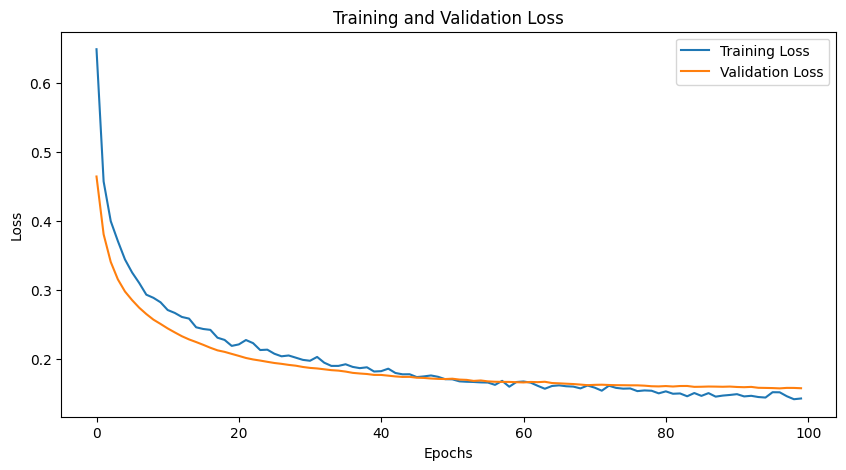

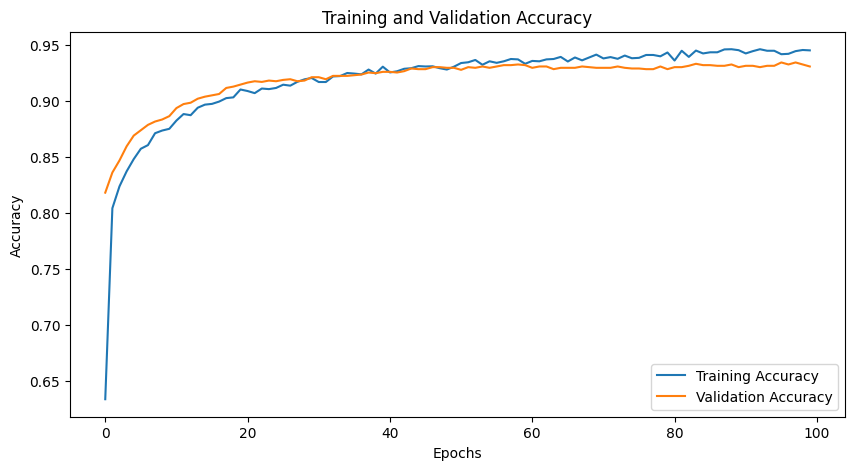

In [235]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Parameters
a = 64  #neurons
b = 0.3  # dropout rate
c = 32  # neurons
d = 0.3  #dropout rate
e = 1  # Binary classification
lr = 0.0001  # learning rate



# Set up the neural network model with adjusted parameters
model = Sequential([
    Dense(a, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(b),
    Dense(c, activation='relu'),
    Dropout(d),
    Dense(e, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=lr),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Save history of training process
hist_df = pd.DataFrame(history.history)

# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(hist_df['loss'], label='Training Loss')
plt.plot(hist_df['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(hist_df['accuracy'], label='Training Accuracy')
plt.plot(hist_df['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### The model is compiled with the Adam optimizer and a binary cross-entropy loss function.
#### The model is trained with the specified parameters.

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


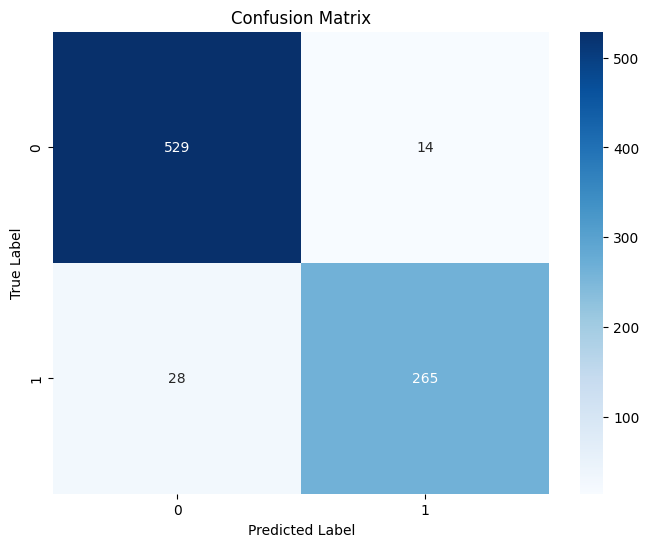

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Predict the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Calculate accuracy and precision

In [237]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
# Calculate accuracy and precision
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print confusion matrix and performance metrics
print(f"Confusion Matrix:\n{cm}")
print(f"True Positive (TP): {tp}")
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")

Confusion Matrix:
[[529  14]
 [ 28 265]]
True Positive (TP): 265
True Negative (TN): 529
False Positive (FP): 14
False Negative (FN): 28
Accuracy: 0.9497607655502392
Precision: 0.9498207885304659


# Regression

## Data Set---Remove the 'NOx(GT)' column

In [238]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the dataset
file_path = 'AirQualityUCI _ Students.xlsx'
data = pd.read_excel(file_path)

# Specify the columns to correct
columns_to_correct = [
    'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 
    'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 
    'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 
    'T', 'RH', 'AH'
]

# Replace -200 with NaN
data[columns_to_correct] = data[columns_to_correct].replace(-200, np.nan)

# Interpolate missing values
data[columns_to_correct] = data[columns_to_correct].interpolate(method='linear')

# Drop rows with any remaining NaN values
data.dropna(inplace=True)

# Create lagged features (previous 1, 2, 3 hours)
lag_hours = [1, 2, 3]
for col in columns_to_correct:
    for lag in lag_hours:
        data[f'{col}_lag_{lag}'] = data[col].shift(lag)

# Drop rows with NaN values created by lagging
data = data.dropna()

# Drop the 'NOx(GT)' column from the features to ensure it is not used in prediction
X = data.drop(columns=['NOx(GT)', 'Date', 'Time'])
y = data['NOx(GT)']

# Convert the Date and Time columns to datetime and then to numerical features
data['DateTime'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'].astype(str))
data['DateTime'] = data['DateTime'].map(pd.Timestamp.timestamp)

# Adjust the dataset split ratios
train_size = int(0.7 * len(data))
val_size = int(0.2 * len(data))
test_size = len(data) - train_size - val_size

X_train = X[:train_size]
y_train = y[:train_size]
X_val = X[train_size:train_size + val_size]
y_val = y[train_size:train_size + val_size]
X_test = X[train_size + val_size:]
y_test = y[train_size + val_size:]

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train_scaled.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val_scaled.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test_scaled.shape)
print("y_test shape:", y_test.shape)


X_train shape: (5848, 51)
y_train shape: (5848,)
X_val shape: (1671, 51)
y_val shape: (1671,)
X_test shape: (836, 51)
y_test shape: (836,)


Epoch 1/100


G:\python\python3.10\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 73379.3438 - mean_absolute_error: 203.2456 - val_loss: 181892.0625 - val_mean_absolute_error: 351.7429
Epoch 2/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - loss: 69792.7578 - mean_absolute_error: 199.9897 - val_loss: 176668.0312 - val_mean_absolute_error: 345.4313
Epoch 3/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - loss: 71046.7188 - mean_absolute_error: 199.7135 - val_loss: 169996.4062 - val_mean_absolute_error: 338.1179
Epoch 4/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - loss: 65974.1094 - mean_absolute_error: 194.7187 - val_loss: 162308.1719 - val_mean_absolute_error: 329.7103
Epoch 5/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - loss: 66240.9922 - mean_absolute_error: 195.1368 - val_loss: 152545.9219 - val_mean_absolute_error: 319.8959
Epoch 6/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - loss: 61974.9766 - mean_absolute_error: 188.9561 - val_loss: 143510.2656 - val_mean_absolute_error: 309.0591
Epoch 7/100
183/18

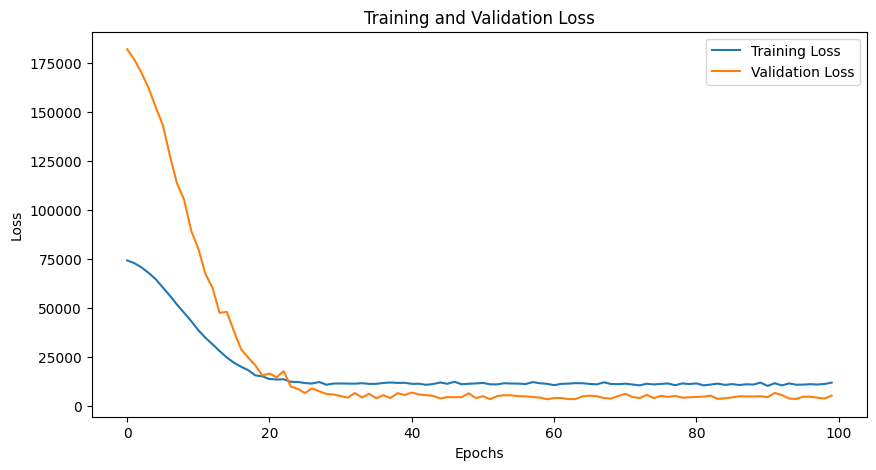

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step


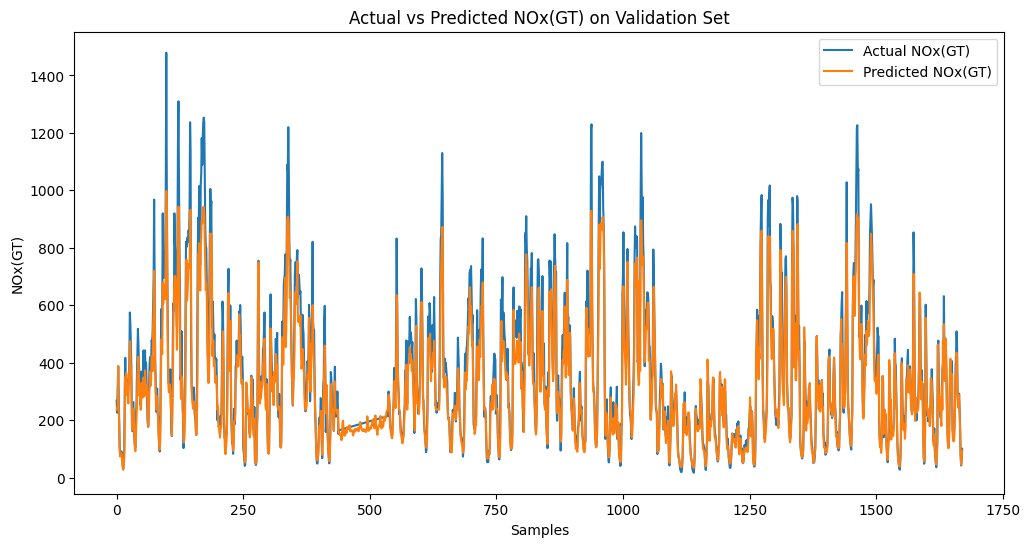

In [239]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model


# Define model parameters
a = 16  # Number of neurons in the first layer
b = 0.45  # Dropout rate for the first layer
c = 8  # Number of neurons in the second layer
d = 0.45  # Dropout rate for the second layer
e = 1  # Output layer for regression
lr = 0.001  # Learning rate


model = Sequential([
    Dense(a, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(b),
    Dense(c, activation='relu'),
    BatchNormalization(),
    Dropout(d),
    Dense(e, activation='linear')  # Output layer for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=lr),
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])


# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_val_scaled, y_val))

# Save history of training process
hist_df = pd.DataFrame(history.history)

# Save the regression model
model.save('G:/dataset/regression.h5')

# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(hist_df['loss'], label='Training Loss')
plt.plot(hist_df['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the validation set
y_val_pred = model.predict(X_val_scaled)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_val.values, label='Actual NOx(GT)')
plt.plot(y_val_pred, label='Predicted NOx(GT)')
plt.title('Actual vs Predicted NOx(GT) on Validation Set')
plt.xlabel('Samples')
plt.ylabel('NOx(GT)')
plt.legend()
plt.show()

In [240]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Predict the test set
y_test_pred = model.predict(X_test_scaled)

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)

# Print performance metrics
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Number of Samples: {len(y_test)}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step
Root Mean Squared Error (RMSE): 51.08852939036428
Mean Absolute Error (MAE): 32.91589791329854
Number of Samples: 836


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Root Mean Squared Error (RMSE): 102.07753184372524
Mean Absolute Error (MAE): 78.95551166644167
Number of Samples: 869


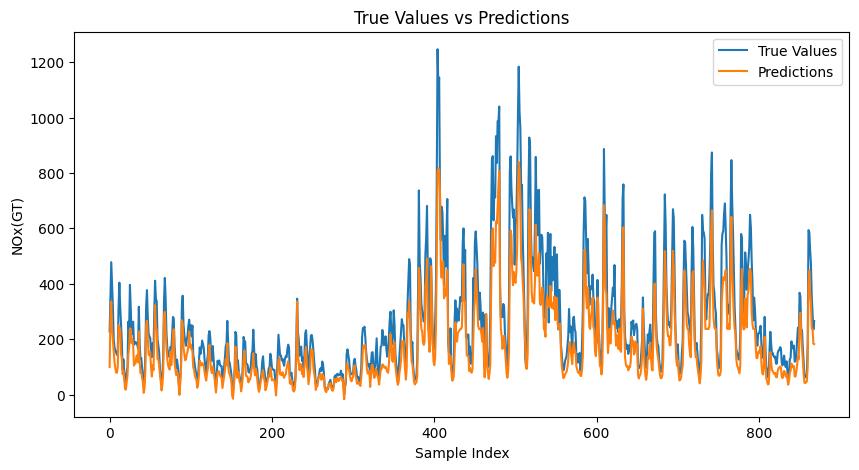

In [243]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

def load_and_test_model(file_path, model_path):
    # Load the dataset
    new_data = pd.read_excel(file_path)

    # Specify the columns to correct
    columns_to_correct = [
        'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 
        'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 
        'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 
        'T', 'RH', 'AH'
    ]

    # Replace -200 with NaN
    new_data[columns_to_correct] = new_data[columns_to_correct].replace(-200, np.nan)

    # Interpolate missing values
    new_data[columns_to_correct] = new_data[columns_to_correct].interpolate(method='linear')

    # Drop rows with any remaining NaN values
    new_data.dropna(inplace=True)

    # Create lagged features (previous 1, 2, 3 hours)
    lag_hours = [1, 2, 3]
    for col in columns_to_correct:
        for lag in lag_hours:
            new_data[f'{col}_lag_{lag}'] = new_data[col].shift(lag)

    # Drop rows with NaN values created by lagging
    new_data = new_data.dropna()

    # Drop the 'NOx(GT)' column from the features to ensure it is not used in prediction
    X_new = new_data.drop(columns=['NOx(GT)', 'Date', 'Time'])
    y_new = new_data['NOx(GT)']

    # Convert the Date and Time columns to datetime and then to numerical features
    new_data['DateTime'] = pd.to_datetime(new_data['Date'].astype(str) + ' ' + new_data['Time'].astype(str))
    new_data['DateTime'] = new_data['DateTime'].map(pd.Timestamp.timestamp)

    # Scale the data
    scaler = StandardScaler()
    X_new_scaled = scaler.fit_transform(X_new)

    # Load the saved model
    model = load_model(model_path)

    # Make predictions on the new data
    predictions = model.predict(X_new_scaled)

    # Return the predictions and the true values
    return pd.DataFrame({'True Values': y_new, 'Predictions': predictions.flatten()}), y_new, predictions.flatten()

# Use the function
file_path = 'G:/dataset/Generalization Dataset.xlsx'
model_path = 'G:/dataset/regression.h5'
results, y_new, predictions = load_and_test_model(file_path, model_path)

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(y_new, predictions))
mae = mean_absolute_error(y_new, predictions)

# Print performance metrics
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Number of Samples: {len(y_new)}")

# Plot true values vs predictions
plt.figure(figsize=(10, 5))
plt.plot(y_new.values, label='True Values')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.title('True Values vs Predictions')
plt.xlabel('Sample Index')
plt.ylabel('NOx(GT)')
plt.show()


In [244]:
# Function to load the saved model and test new data
def load_and_test_classification_model(file_path, model_path, threshold):
    # Load the dataset
    new_data = pd.read_excel(file_path)

    # Specify the columns to correct (if necessary)
    columns_to_correct = [
        'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 
        'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 
        'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 
        'T', 'RH', 'AH'
    ]

    # Replace -200 with NaN (if necessary)
    new_data[columns_to_correct] = new_data[columns_to_correct].replace(-200, np.nan)

    # Interpolate missing values
    new_data[columns_to_correct] = new_data[columns_to_correct].interpolate(method='linear')

    # Drop rows with any remaining NaN values
    new_data.dropna(inplace=True)

    # Create lagged features (previous 1, 2, 3 hours)
    lag_hours = [1, 2, 3]
    for col in columns_to_correct:
        for lag in lag_hours:
            new_data[f'{col}_lag_{lag}'] = new_data[col].shift(lag)

    # Drop rows with NaN values created by lagging
    new_data = new_data.dropna()

    # Create the target labels
    new_data['CO_Target'] = (new_data['CO(GT)'] > threshold).astype(int)

    # Split the features and target
    X_new = new_data.drop(columns=['CO_Target', 'Date', 'Time', 'CO(GT)'])
    y_new = new_data['CO_Target']

    # Convert the Date and Time columns to datetime and then to numerical features
    new_data['DateTime'] = pd.to_datetime(new_data['Date'].astype str) + ' ' + new_data['Time'].astype(str)
    new_data['DateTime'] = new_data['DateTime'].map(pd.Timestamp.timestamp)

    # Scale the data
    scaler = StandardScaler()
    X_new_scaled = scaler.fit_transform(X_new)

    # Load the saved model
    model = load_model(model_path)

    # Make predictions on the new data
    predictions = model.predict(X_new_scaled)
    predicted_classes = (predictions > 0.5).astype(int)

    # Calculate performance metrics
    accuracy = accuracy_score(y_new, predicted_classes)
    precision = precision_score(y_new, predicted_classes, average='weighted')
    recall = recall_score(y_new, predicted_classes, average='weighted')
    f1 = f1_score(y_new, predicted_classes, average='weighted')
    cm = confusion_matrix(y_new, predicted_classes)

    # Print performance metrics
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Number of Samples: {len(y_new)}")

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2868817939.py, line 40)